In [19]:
# 模型训练-验证

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [21]:
train_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_train.txt'
test_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_test.txt'

train_data = pd.read_csv(train_path, delimiter="\t", encoding='utf-8')
test_data = pd.read_csv(test_path, delimiter="\t", encoding='utf-8')

In [22]:
# 数据归一化处理

from sklearn.preprocessing import MinMaxScaler
feature_columns = [col for col in train_data.columns if col not in  ['target']]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_data[feature_columns])
train_data_scaler = min_max_scaler.transform(train_data[feature_columns])
test_data_scaler = min_max_scaler.transform(test_data[feature_columns])
train_data_scaler = pd.DataFrame(train_data_scaler)
test_data_scaler= pd.DataFrame(test_data_scaler)
train_data_scaler.columns = feature_columns
train_data_scaler['target'] = train_data['target']
test_data_scaler.columns = feature_columns
# display(train_data_scaler.describe())

In [23]:
# pca 降维，保留16个特征
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, :-1])
new_test_pca_16 = pca.fit_transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']


In [24]:
# 将数据进行切分
from sklearn.model_selection import train_test_split

new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# train_test_split?
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0 )

In [25]:
# 欠拟合
clf = SGDRegressor(max_iter=500, tol=1e-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train score: ', score_train)
print('SGDRegressor test score: ', score_test)

SGDRegressor train score:  0.15155183334372427
SGDRegressor test score:  0.155824504453808


In [26]:
# 过拟合
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures?
poly = PolynomialFeatures(degree=5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('PolynomialFeatures 5 train score: ', score_train)
print('PolynomialFeatures 5  test score: ', score_test)

PolynomialFeatures 5 train score:  0.1323757787414136
PolynomialFeatures 5  test score:  0.14446407943989173


In [27]:
# 正常拟合
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('PolynomialFeatures 5 train score: ', score_train)
print('PolynomialFeatures 5  test score: ', score_test)

PolynomialFeatures 5 train score:  0.13402008037929974
PolynomialFeatures 5  test score:  0.1425129603274109


In [28]:
# 模型正则化
# L2范数
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L2')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('L2 train score: ', score_train)
print('L2 test score: ', score_test)

L2 train score:  0.13406068127895662
L2 test score:  0.1424578745035301


In [29]:
# L1范数
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L1')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('L1 train score: ', score_train)
print('L1 test score: ', score_test)

L1 train score:  0.13473343195312143
L1 test score:  0.14292144279882937


In [30]:
# 弹性网络
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('elasticnet train score: ', score_train)
print('elasticnet test score: ', score_test)

elasticnet train score:  0.13442729097154174
elasticnet test score:  0.1427987484972011


In [31]:
# 交叉验证
# 简单交叉验证
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train score: ', score_train)
print('SGDRegressor test score: ', score_test)

SGDRegressor train score:  0.14159474340999628
SGDRegressor test score:  0.1471038723157005


In [32]:
# K折交叉验证
from sklearn.model_selection import KFold
# ValueError: Found input variables with inconsistent numbers of samples: [2311, 2310]

# kf = KFold(n_splits=5)
# for k, (train_index, test_index) in enumerate(kf.split(train)):
#     if (k == 3):
#         print(train.shape)
#         print(train_index)
#         print(test_index)
#     train_data, test_data, train_taret, test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
#     clf = SGDRegressor(max_iter=1000, tol=1e-3)
#     clf.fit(train_data, train_target)
#     score_train = mean_squared_error(train_target, clf.predict(train_data))
#     score_test = mean_squared_error(test_target, clf.predict(test_data))
#     print(k, '折', 'SGDRegressor train score: ', score_train)
#     print(k, '折', 'SGDRegressor test score: ', score_test)

In [33]:
# 留一法验证
from sklearn.model_selection import LeaveOneOut
# loo = LeaveOneOut()
# # kf = KFold(n_splits=5)
# for k, (train_index, test_index) in enumerate(loo.split(train)):
#     train_data, test_data, train_taret, test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
#     clf = SGDRegressor(max_iter=1000, tol=1e-3)
#     clf.fit(train_data, train_target)
#     score_train = mean_squared_error(train_target, clf.predict(train_data))
#     score_test = mean_squared_error(test_target, clf.predict(test_data))
#     print(k, '折', 'SGDRegressor train score: ', score_train)
#     print(k, '折', 'SGDRegressor test score: ', score_test)
#     if k > 9:
#         break

In [34]:
# 调参 穷举网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
randomFrestRegression = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 2, 3]}
clf = GridSearchCV(randomFrestRegression, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('RandomForestRegressor GridSearchCV test score', score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test score 0.2575971035863264


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
# 调参 随机搜索
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
randomFrestRegression = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200, 300], 'max_depth': [1, 2, 3, 4, 5]}
clf = RandomizedSearchCV(randomFrestRegression, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('RandomizedSearchCV GridSearchCV test score', score_test)
# sorted(clf.cv_results_.keys())
# print(clf.best_params_)
# {'n_estimators': 50, 'max_depth': 5}

RandomizedSearchCV GridSearchCV test score 0.19588973786426667


In [36]:
# 调参 随机搜索
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import lightgbm as lgb

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
clf = lgb.LGBMRegressor(num_leaves=31)
# clf?
parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]}
clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('LGBMRegressor GridSearchCV test score', score_test)
print('LGBMRegressor best parameters: ', clf.best_params_)

LGBMRegressor GridSearchCV test score 0.15195486501296265
LGBMRegressor best parameters:  {'learning_rate': 0.1, 'n_estimators': 40}


In [40]:
# LGB线下验证
train_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_train.txt'
test_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_test.txt'

train_data2 = pd.read_csv(train_path, delimiter="\t", encoding='utf-8')
test_data2 = pd.read_csv(test_path, delimiter="\t", encoding='utf-8')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# LGB模型
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
MSE_DICT = {'train_mse': [], 'test_mse': []}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    lgb_reg = lgb.LGBMRegressor(learning_rate=0.01,
                               max_depth = -1,
                               n_estimators=5000,
                               boosting_type='gbdt',
                               random_state=2019,
                               objective='regression')
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
               eval_names=['Train', 'Test'],
               early_stopping_rounds=100,
               eval_metric='MSE',
               verbose=50)
    # 训练集和测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold, num_iteration=lgb_reg.best_iteration_)
    
    print('第{}折 训练和预测训练MSE 预测MSE'.format(i + 1))
    train_mse = mean_squared_error(y_train_KFold, y_train_KFold_predict)
    print('-----\n', '训练MSE\n', train_mse, '\n----')
    test_mse = mean_squared_error(y_test_KFold, y_test_KFold_predict)
    print('-----\n', '预测MSE\n', test_mse, '\n----')
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
    

print('-----\n', '训练MSE\n', MSE_DICT['train_mse'], '\n',
      np.mean(MSE_DICT['train_mse']),'\n----')
print('-----\n', '预测MSE\n', MSE_DICT['test_mse'], '\n',
      np.mean(MSE_DICT['test_mse']),'\n----')
    
    

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2

[900]	Train's l2: 0.0176946	Test's l2: 0.100402
[950]	Train's l2: 0.0163089	Test's l2: 0.100187
[1000]	Train's l2: 0.0150397	Test's l2: 0.099986
[1050]	Train's l2: 0.0138704	Test's l2: 0.0998263
[1100]	Train's l2: 0.0128394	Test's l2: 0.0996427
[1150]	Train's l2: 0.0118688	Test's l2: 0.0996074
[1200]	Train's l2: 0.0110126	Test's l2: 0.0995783
[1250]	Train's l2: 0.0102254	Test's l2: 0.0995361
[1300]	Train's l2: 0.00951201	Test's l2: 0.0993949
[1350]	Train's l2: 0.00884199	Test's l2: 0.0992683
[1400]	Train's l2: 0.00822777	Test's l2: 0.0993064
[1450]	Train's l2: 0.00767529	Test's l2: 0.0992335
[1500]	Train's l2: 0.00712999	Test's l2: 0.0992797
Early stopping, best iteration is:
[1423]	Train's l2: 0.00797142	Test's l2: 0.0992124
第5折 训练和预测训练MSE 预测MSE
-----
 训练MSE
 0.007971416523938925 
----
-----
 预测MSE
 0.09921237825179019 
----
-----
 训练MSE
 [0.0014891170026875996, 0.0072898318628357595, 0.0204510246350711, 0.009355847634266076, 0.007971416523938925] 
 0.009311447531759892 
----
-----
 预

# 学习曲线

<module 'matplotlib.pyplot' from 'd:\\devtools\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

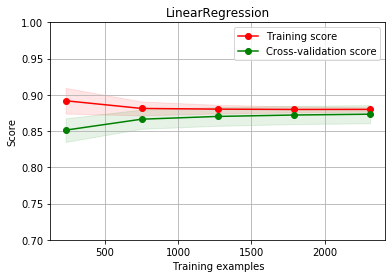

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)

def plot_learning_curve(estimator, title, X, y,
                        ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
#     learning_curve?
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator,
                                                           X=X, y=y, cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color='r')
    
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color='g')
    
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color='r',
             label='Training score')
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
title = 'LinearRegression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator=estimator,
                    title=title,
                    X=X,
                    y=y,
                    ylim=(0.7, 1.0),
                    cv=cv,
                    n_jobs=-1)

    

<module 'matplotlib.pyplot' from 'd:\\devtools\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

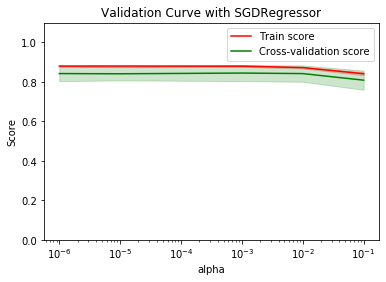

In [61]:
# 验证曲线
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, X, y, ylim=None,
                         cv=None, n_jobs=1):
    plt.figure()
    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    if ylim is not None:
        plt.ylim(*ylim)
    
#     validation_curve?
    param_range = [0.1, 0.01, 0.001, 0.00001, 0.000001]
    train_scores, test_scores = validation_curve(estimator=estimator,
                                                              X=X, y=y, 
                                                              param_name='alpha',
                                                              param_range=param_range,
                                                              cv=cv,
                                                              scoring='r2',
                                                              n_jobs=n_jobs)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.ylim(0.0, 1.1)
#     plt.grid()
    plt.semilogx(param_range, train_scores_mean, label='Train score', color='r')
    plt.fill_between(param_range,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.2,
                     color='r')
    plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='g')
    plt.fill_between(param_range,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2,
                     color='g')
    
    
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
ylim = (0.0, 1.1)
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1')
plot_validation_curve(estimator=estimator, X=X, y=y, ylim=ylim, cv=10, n_jobs=-1)

In [58]:
from sklearn.model_selection import validation_curve
validation_curve?